In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [13]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\python\ML\data for practice\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
LE = LabelEncoder()

In [23]:
cols = ['sex','smoker','region']
for col in cols:
    data[col] = LE.fit_transform(data[col])
print(data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [25]:
data.value_counts()

age  sex  bmi     children  smoker  region  charges    
19   1    30.590  0         0       1       1639.56310     2
47   1    29.830  3         0       1       9620.33070     1
48   0    25.850  3         1       2       24180.93350    1
          22.800  0         0       3       8269.04400     1
47   1    47.520  1         0       2       8083.91980     1
                                                          ..
31   0    25.740  0         0       2       3756.62160     1
          23.600  2         0       3       4931.64700     1
          21.755  0         0       1       4134.08245     1
30   1    44.220  2         0       2       4266.16580     1
64   1    40.480  0         0       2       13831.11520    1
Name: count, Length: 1337, dtype: int64

In [40]:
x = data.drop('charges',axis = 1)

In [42]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [198]:
# from sklearn.preprocessing import StandardScaler
# sd = StandardScaler()


# y = sd.fit_transform(data[['charges']])
y = data['charges']

In [200]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [204]:
LR = LinearRegression()

In [206]:
LR.fit(x_train,y_train)

LinearRegression()

In [208]:
y_pred = LR.predict(x_test)
print(y_pred[:10])

[ 8931.42116433  7070.90670308 36937.08049605  9596.99214428
 27008.35487143 10866.48485361    37.46102168 17222.80920435
   918.30811536 11396.55374009]


In [210]:
LR.score(x_test,y_test)

0.7694415927057693

In [212]:
from sklearn.metrics import r2_score

In [214]:
r2_score(y_test,y_pred)

0.7694415927057693

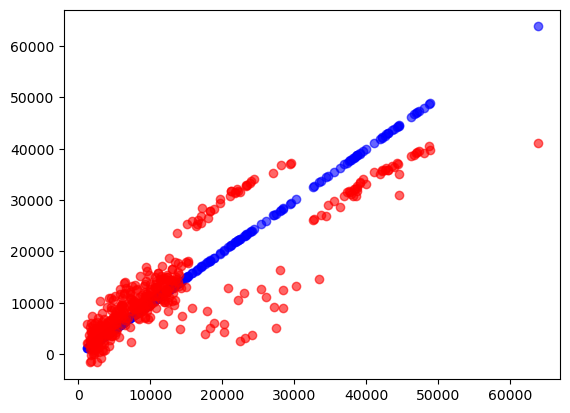

In [216]:
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values (y)")  # Blue for actual values
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label="Predicted Values (y_pred)")  

In [218]:
#using cross val score and kfold
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict

In [220]:
kfold = KFold(5)

In [222]:
cross_val_score(LR,x,y,cv=5).mean()

0.7472559473580954

In [224]:
#using leave one out method

In [226]:
from sklearn.model_selection import LeaveOneOut

In [228]:
LOO = LeaveOneOut()

In [230]:
v = cross_val_score(LR,x,y,scoring = 'neg_mean_squared_error',cv=LOO).mean()

In [231]:
print(f"(%.3f)"%(v))

(-36967446.189)


In [234]:
#using shuffle split
from sklearn.model_selection import ShuffleSplit

In [238]:
SS = ShuffleSplit()
cross_val_score(LR,x,y,cv = SS).mean()

0.7485835303402272